# Group 41 STAT-301 Project Proposal: Predicting Metacritic Score of Steam Games
### Introduction

Steam is the largest digital distribution platform for computer games. The platform can be seen as a digital community market. It allows its users to purchase games, adding them to a virtual library from which they may be downloaded and installed an unlimited number of times. Metacritic scores rate the overall performance of video games ranging from 0-100, with higher scores indicating more positive reviews, and lower scores indicating less favorable reviews from critics. These scores are helpful since there are thousands of different types of video games published on Steam and consumers may find it difficult to make decisions. There is also research showing that Metacritic scores at least partially explain player experience (Johnson et al., 2014). Therefore, a game's Metacritic score may help consumers make a decision about their game purchasing. And since Metacritic scores have a strong correlation with game sales (Greenwood-Ericksen et al., 2013), understanding and predicting them is important for sellers as well.

 In our project, we will predict the Metacritic score of Steam games (the response variable) released after the year 1970, based on input variables such as the price, the number of recommendations, and release date of a game. The project will be focused on prediction and not inference, as our main goal is to predict the game's Metacritic Score.
 
 
 The dataset we used is collected and released under the Steam API (Steam Games, 2022). It has the following 19 variables:
- 'ResponseName'
- 'ReleaseDate'
- 'Metacritic'
- 'RecommendationCount'
- 'IsFree'
- 'GenreIsNonGame'
- 'GenreIsIndie'
- 'GenreIsAction'
- 'GenreIsAdventure'
- 'GenreIsCasual'
- 'GenreIsStrategy'
- 'GenreIsRPG'
- 'GenreIsSimulation'
- 'GenreIsEarlyAccess'
- 'GenreIsFreeToPlay'
- 'GenreIsSports'
- 'GenreIsRacing'
- 'GenreIsMassivelyMultiplayer'
- 'PriceInitial'

The variable `ResponseName` will not be used as it is a unique value representing the name of a game. The continuous input variables in this dataset are `ReleaseDate` (representing the number of days passed since January 1st, 1970), `PriceInitial` (the price of a video game), and `RecommendationCount` (the number of recommendations of a game on Steam). The other variables are logicals (i.e. TRUE  or FALSE) that say whether or not a game fits into a certain genre or category. 


### Preliminary Results
In this section, we will demonstrate that we can read the data from the web and wrangle it into a tidy format. We will also address our primary question with plots and tables.
#### Reading the Data

In [1]:
# load libraries + set options

options(jupyter.plot_mimetypes="image/png")

library(repr)
library(digest)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(tidyverse)
library(broom)
library(glmnet)
library(repr)
library(car)
library(GGally)



options(jupyter.plot_mimetypes = "image/png")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()    masks gridExtra::combine()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ tidyr::replace_na() masks mltools::replace_na()
Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-2

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


The following objects are masked from ‘package:faraway’:

    logit, vif


Registered S3 method overwritten by 'GGally':
  method from   


In [2]:
#read_csv on a url, which responds with the data
steam_games <- read_csv('https://raw.githubusercontent.com/DanielZCode/STAT-301-Project/main/games-features-edit.csv')
                                                                                           
head(steam_games) # preview of the data 
nrow(steam_games) # 12624 data points (games)
colnames(steam_games) #variable names, number of variables == 19
#length(colnames(steam_games)) #prints out number of variables



Rows: 12624 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ResponseName, ReleaseDate
dbl  (3): Metacritic, RecommendationCount, PriceInitial
lgl (14): IsFree, GenreIsNonGame, GenreIsIndie, GenreIsAction, GenreIsAdvent...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
Counter-Strike,Nov 1 2000,88,68991,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Team Fortress Classic,Apr 1 1999,0,2439,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Day of Defeat,May 1 2003,79,2319,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Deathmatch Classic,Jun 1 2001,0,888,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Half-Life: Opposing Force,Nov 1 1999,0,2934,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Ricochet,Nov 1 2000,0,1965,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99


[1] 12624

[1] "ResponseName"                "ReleaseDate"                
 [3] "Metacritic"                  "RecommendationCount"        
 [5] "IsFree"                      "GenreIsNonGame"             
 [7] "GenreIsIndie"                "GenreIsAction"              
 [9] "GenreIsAdventure"            "GenreIsCasual"              
[11] "GenreIsStrategy"             "GenreIsRPG"                 
[13] "GenreIsSimulation"           "GenreIsEarlyAccess"         
[15] "GenreIsFreeToPlay"           "GenreIsSports"              
[17] "GenreIsRacing"               "GenreIsMassivelyMultiplayer"
[19] "PriceInitial"

#### Data Wrangling 
In order to correctly use the `ReleaseDate` variable, we will need to convert it from its current character-based format to a numerical value. Although it would be convenient to convert this variable year that the game was released, that would not be a true continuous variable since years are mostly discrete (especially in the case of Steam games, where the data available is fairly recent). Hence, we will need to convert `ReleaseDate` to a continuous variable representing the number of days passed since January 1st, 1970. This is a common representation of time in computers. 

In addition, we will filter the data for missing values, and also check that a game's `Metacritic` score is not 0, because that indicates a lack of reviews and an unplayed game. By safely removing those outliers and missing values, we can generate the more accurate model. We will also filter only for games that were released after 1970.


In [3]:
sum(is.na(steam_games)) # dataset has 86 missing data points
sum(is.na(steam_games$ReleaseDate)) #all missing data is inside the ReleaseDate 

set.seed(3012)

#convert dates to days since 1970 (default internal representation) 
steam_games$ReleaseDate <- steam_games$ReleaseDate %>% as.Date(format="%b%d%Y") %>%  as.numeric() 


steam_games <- steam_games %>% drop_na() %>% filter(Metacritic > 0, ReleaseDate > 0) # filter for more than 0 days passed since 1970, metacritic score > 0

steam_games <- steam_games %>% mutate_if(is.logical, as_factor) #convert logicals to factors



length(unique(steam_games$GenreIsNonGame)) # == 1, hence only one value for this variable is present, no variation

steam_games <- steam_games %>% select(-GenreIsNonGame,-GenreIsFreeToPlay) # remove variables

head(steam_games)
nrow(steam_games) ## number of steam games, filtered


[1] 86

[1] 86

[1] 1

ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
Counter-Strike,11262,88,68991,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Day of Defeat,12173,79,2319,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Half-Life,10538,96,12486,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Counter-Strike: Condition Zero,12478,65,7067,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Counter-Strike: Condition Zero,12478,65,7067,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Half-Life: Blue Shift,11474,71,2219,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99


[1] 2241

After wrangling the data in this way, we are left with 2241 observations, down from the original 12624 observations. When considering the distribution of NA values and which observations were removed, we chose a naive CC method and assumed that values were missing at completely random.


In this dataset, it turns out that the `GenreIsNonGame` variable is always false. Because this variable has no variation, it will be removed.

The binary variable `IsFree` is equivalent to the the binary variable `GenreIsFreeToPlay`. Therefore, the GenreIsFreeToPlay will be removed.

#### Exploratory Analysis
In this section we will explore some estimates variables. In addition we will plot visualizations of our reponse variable, `Metacritic`, and its relation to other variables.

First, let us see the distribution of `Metacritic` scores.

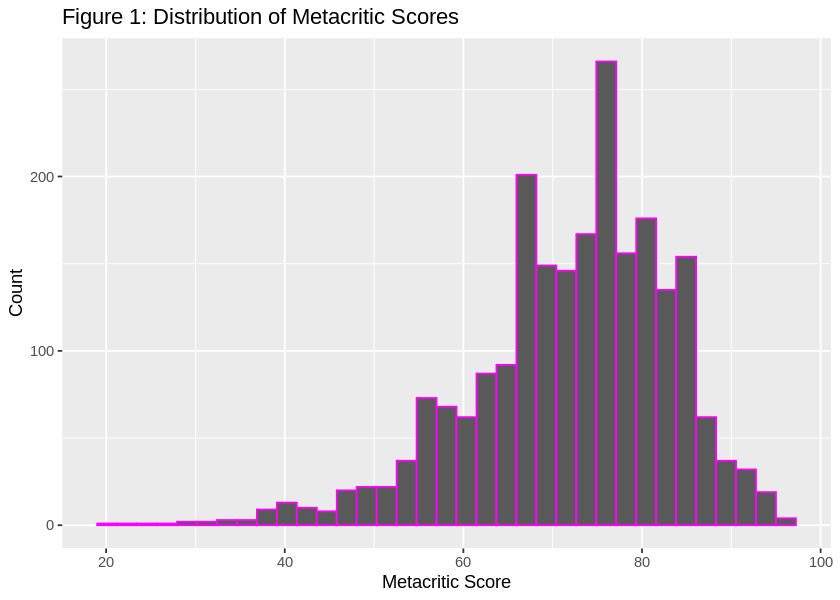

In [4]:
options(repr.plot.width = 7, repr.plot.height = 5)

steam_games_metacritic_dist <- steam_games %>% ggplot() +
    geom_histogram(aes(x = Metacritic), bins = 35, color = '#FF00FF') +
    ggtitle('Figure 1: Distribution of Metacritic Scores') +
    labs(x = 'Metacritic Score', y = 'Count')

steam_games_metacritic_dist

    

Next, let us plot the relationship of Metacritic Score with the other continous variables.

In [ ]:
steam_games_metacritic_releasedate_plot <- steam_games %>% ggplot() +
    geom_point(aes(x = ReleaseDate, y = Metacritic), size = 0.8, alpha = 0.7) +
    geom_smooth(aes(x = ReleaseDate, y = Metacritic), method = lm, se = FALSE, size = 1.5) +
    ggtitle('Figure 2: Relationship Between Metacritic Score and Release Date of a Game') +
    labs(y = 'Metacritic Score', x = 'Release Date (Number of Days passed since 1970)')
steam_games_metacritic_releasedate_plot

`geom_smooth()` using formula 'y ~ x'



In [ ]:
steam_games_metacritic_price_plot <- steam_games %>% ggplot() +
    geom_point(aes(x = PriceInitial, y = Metacritic),  size = 0.8, alpha = 0.7) +
    geom_smooth(aes(x = PriceInitial, y = Metacritic), method = lm, se = FALSE, size = 1.5) +
    ggtitle('Figure 3: Relationship Between Price of a Game and Metacritic Score') +
    labs(y = 'Metacritic Score', x = 'Price of a Game on Steam ($USD)')
steam_games_metacritic_price_plot

In [ ]:
steam_games_metacritic_recommendation_plot <- steam_games %>% ggplot() +
    geom_point(aes(x = RecommendationCount, y = Metacritic),  size = 0.8, alpha = 0.7) +
    geom_smooth(aes(x = RecommendationCount, y = Metacritic), method = lm, se = FALSE, size = 1.5) +
    scale_x_continuous(limits = c(0, 10000)) +
    ggtitle('Figure 4: Relationship Between Recommendation Count and Metacritic Score') +
    labs(y = 'Metacritic Score', x = 'Recommendation Count (Number of Recommendations Received on Steam)')
steam_games_metacritic_recommendation_plot

**Note:** About 180 data points were removed in **Figure 4** for increased clarity.


#### Estimates
Below we will compute some estimates of the data.


In [ ]:
steam_games_summarized <- steam_games %>% summarize(Metacritic_mean = mean(Metacritic),
                                                    Metacritic_sd = sd(Metacritic),
                                                    ReleaseDate_mean = mean(ReleaseDate), 
                                                    ReleaseDate_mean_Date = format(as.Date(ReleaseDate_mean, origin ='1970-01-01'), '%B %d, %Y'),
                                                    RecommendationCount_mean = mean(RecommendationCount),
                                                    PriceInitial_mean = mean(PriceInitial))
steam_games_summarized

**Figure 5. Averages of different variables**

As we can see, the average Metacritic score of a Steam game is approximately **72**, and the average release date was in **November, 2012**. In addition, Steam games have received around **4600** recommendations on average, and have a mean price of approximately **$15**.

### Methods and Results

First, we should split the data into a training and testing set, where the training set is 60% of the entire data. This is done in the cell below. 

In [ ]:
set.seed(3012)
steam_games$ID = 1:nrow(steam_games)
training_Steam <- sample_n(steam_games, size = nrow(steam_games) * 0.60,
  replace = FALSE
)

testing_Steam <- anti_join(steam_games,
  training_Steam,
  by = "ID"
)

# Remove Game ID
training_Steam <- training_Steam %>% select(-"ID")
testing_Steam <- testing_Steam %>% select(-"ID")
head(training_Steam)


#### Preliminary Model
Before creating our model, we would like to first check the assumptions of the model hold, namely that multicollinearity is minimal. We do this in the cell below by computing the variance inflation factor.

In [ ]:
lasso_variables_vif <- 
   vif(lm(Metacritic ~ReleaseDate+RecommendationCount+IsFree+GenreIsIndie+GenreIsAction+GenreIsAdventure+GenreIsCasual+GenreIsStrategy+GenreIsRPG+GenreIsSimulation+GenreIsEarlyAccess+GenreIsSports+
GenreIsRacing+GenreIsMassivelyMultiplayer+PriceInitial,data=training_Steam))

lasso_variables_vif

All of the input variables have a variance inflation factor (VIF) of between 1 - 1.5. Because the VIF is not very high, we are reasonably confident that multicollinearity will not be a problem.

Now, let's compute an additive linear regression model using all of the variables. 

In [ ]:
steam_games_mlr_add <- lm(Metacritic ~ ., data = training_Steam %>% select(-ResponseName)) #use training steam as the data, but omit ResponseName

steam_games_mlr_add_tidy <- tidy(steam_games_mlr_add, conf.level = 0.9, conf.int = TRUE) %>% mutate_if(is.numeric, round, 2) #show estimates and intervals
steam_games_mlr_add_tidy

**Figure 6. Estimated Coefficients of an Additive Multiple Linear Regression Model**

With this full addictive model, let's further check the assumption of normality and whether heteroscedasticity exists in the dataset which means the errors do not have equal variance, we will diagose graphically by checking the QQ plot and comparing the fitted values to the residuals.

In [ ]:
plot(steam_games_mlr_add,1:2)

**Figure 7. Residuals vs. Fitted Values** (top) and **Figure 8. Q-Q Plot** (bottom)

Ignoring some outliers the data seems to be approximately normal and homoscedastic, also by the CLT that our sample size is large enough, so we can assume the distribution is normal, and the error term is also normally distributed. Therefore, we have checked that the model assumptions are met for our dataset.

Below we will compute the p-value of this model to ensure that it is better than an intercept-only model. 

In [ ]:
glance(steam_games_mlr_add)$p.value

A low p-value such as this suggests that it is has a higher goodness-of-fit than an intercept-only model. However, the full model above may not be the best, as there might be some variables that might are not very relevant to prediction. 

Let's try using an automated proceedure to select the variables (forward selection).

In [ ]:
steam_forward_sel<- regsubsets(
    x = Metacritic ~., nvmax=15,
    data=training_Steam[,-1],
    method="forward",
    )
steam_forward_summary<-summary(steam_forward_sel) 
steam_forward_summary

We are going to select the best one in terms of its goodness of fit from the 15 possible models.

In [ ]:
steam_forward_summary_df<-tibble(
n_input_variables = 1:15,
RSQ = steam_forward_summary$rsq,
RSS = steam_forward_summary$rss,
ADJ.R2 = steam_forward_summary$adjr2,
Cp = steam_forward_summary$cp,
BIC = steam_forward_summary$bic
    )
steam_forward_summary_df

**Figure 9. Forward Selection Results**

For the purpose of create a "best" predictive model we will looking for the smallest $C_p$ value. Thus, we select the predictive model with 8 variables.

The variables we selected are:
1. "ReleaseDate" 2. "RecommendationCount" 3. "GenreIsAction" 4. "GenreIsRPG" 5. "GenreIsSimulation" 
6. "GenreIsEarlyAccess" 7. "GenreIsMassivelyMultiplayer" 8."PriceInitial"

Let's train the selected models and use it to predict in the test set

In [ ]:
steam_games_mlr_red <- lm(Metacritic ~ ReleaseDate+RecommendationCount+GenreIsAction+
                          GenreIsRPG+GenreIsSimulation+GenreIsEarlyAccess+
                          GenreIsMassivelyMultiplayer+PriceInitial, 
    data = training_Steam %>% select(-ResponseName)) #To estimeate we use training steam as the data, but omit ResponseName

steam_games_pred_red <- predict(steam_games_mlr_red, newdata = testing_Steam)
head(steam_games_pred_red) #predict on test set


testing_Steam_lm_format <- testing_Steam %>% select(-Metacritic, -ResponseName)

Steam_test_pred_full_mlr <- predict(steam_games_mlr_add,
  newdata = testing_Steam_lm_format)

steam_games_R_MSE_models <- tibble(
Model = "OLS Reduced Regression",
R_MSE = rmse(
preds = steam_games_pred_red,
actuals = testing_Steam$Metacritic
)
)

rbind(steam_games_R_MSE_models,
      tibble(Model = "Full Additive Linear Regression (No penalization or selection)",
            R_MSE = rmse(
                preds = Steam_test_pred_full_mlr,
                actuals = testing_Steam$Metacritic
            )
            )
      )


**Figure 10. Reduced Model, Full Additive Model**

We can see that our reduced model has slightly better (or at least equal) predictive performance on the testing set. This is a good sign, especially since we around half of the variables were removed in forward selection.  

## Lasso 
We would like to also compare the Lasso penalized penalized method to select the variables.


To continue with LASSO selection, will build a matrix and vector with the data so it can be properly used by the `glmnet` function.

In [ ]:
# head(training_Steam)
# nrow(training_Steam)
#head(testing_Steam)
# nrow(testing_Steam)
Steam_X_test <- testing_Steam %>% select(-"Metacritic",-"ResponseName")  %>% data.matrix()
Steam_Y_test <- unlist(testing_Steam[, "Metacritic"])%>%as.numeric()
# Build matrix and vector required by `glmnet`

Steam_X_train <- model.matrix(Metacritic ~ . -ResponseName,
  data = training_Steam)[, -1] #remove index

Steam_Y_train <- unlist(training_Steam[, "Metacritic"])%>%as.numeric()

head(Steam_X_train) 
head(Steam_Y_train)


We will now select the value of  𝜆  that provides the smallest  MSE test  using cross-validation. Finally, we will fit the model using this lambda value.

In [ ]:
Steam_cv_lambda_LASSO <- cv.glmnet(
  x = Steam_X_train, y = Steam_Y_train,
  alpha = 1)


Steam_lambda_min_MSE <- round(Steam_cv_lambda_LASSO$lambda.min, 4)
Steam_lambda_min_MSE

options(repr.plot.height = 8, repr.plot.width = 10)
par(mar = c(5, 4.1, 7, 2.1))
plot(Steam_cv_lambda_LASSO)
title(main = 'LASSO Lambda Selection, cross validation', cex.main = 1.5)

**Figure 11. Lambda Selection Plot, LASSO**

In [ ]:
#Fit Lasso regression with selected lamda
LASSO_min_add <- glmnet(
  x = Steam_X_train, y = Steam_Y_train,
  alpha = 1,
  lambda = Steam_lambda_min_MSE
)

coef(LASSO_min_add)


Unfortunately, it looks like LASSO selected against using all of the variables, and chose to use only the intercept. This is a problem of Lasso penalized method dealing with categorial variables. 

Now, we will use the trained model to predict the Metacritic score in the test set, computing the rmse. For comparison, we will also show the rmse of the full moded and reduced model (that used forward selection). 

In [ ]:
Steam_test_pred_LASSO <- predict(LASSO_min_add,
  newx =Steam_X_test)

rmse_stats <- tibble(
    Model = "LASSO Regression with minimum MSE",
    R_MSE = rmse(
      preds = Steam_test_pred_LASSO,
      actuals = testing_Steam$Metacritic
    )
  )




rmse_stats %>% rbind(
    rbind(steam_games_R_MSE_models,
      tibble(Model = "Full Additive Linear Regression (No penalization or selection)",
            R_MSE = rmse(
                preds = Steam_test_pred_full_mlr,
                actuals = testing_Steam$Metacritic
            )
            )
          )
    )



**Figure 12. RMSE of LASSO Selected model, Reduced Model, and Full Additive Linear Regression**

RMSE measures is generally a measure of error between our predicted values and the actual values. A lower RMSE is better. In this case, these results imply that the square root of the average of the square residuals is around 11 for three of our models. In this case, the reduced linear regression model selected by forward selection performed slightly better, but these results may be down to chance and the particular split of the data.  


### Discussion

This report uses a large dataset of 12624 games and 19 variables. Once filtered to remove observations with missing values, the sample size became more reasonable, at around 2000.
Wrangling was done to make variables easier to use in our model. The ReleaseDate variable was converted from a character format to a continuous variable. All of the logical variables representing a game's genre or category were converted to a factor so that our models could use them.

The report uses scatterplots and tables to visualize and summarize the data and the relationships between variables. It also fits an additive multiple linear regression model using all of the variables in the dataset. 

Now, we will discuss assumptions. We used the variance inflation factor (VIF) to check multicollinearity. Since the VIF for all of the variables was fairly close to 1 (no higher than 1.5), we concluded that multicollinearity would not be a significant problem. Next, we used a Q-Q plot and a residuals vs. fitted values plato to confirm that assumptions of normality of the error terms, and a consistent variance (homoscedasticity) were held. We could not conclusively confirm the linearity of the relationship of the response and input variables, and this is a potential flaw in our model. 

Next, we constructed a full linear regression model, using all of the variables. For comparison, and to simplify the model, we then used forward selection to select the variables. For the reduced model, we chose a model with 8 input variables, according to Mallow’s $C_p$, which estimates predictive performance. Finally, for additional comparison we also experimented with LASSO selection and penalization. However, our LASSO model did not select any of the variables and used an intercept-only model. We are not too sure why, but it may have something to do with having lots of categorical variables. We could explore this more in the future. 

After computing the root mean squared error (RMSE) of our 3 models using the test set, our results show that the reduced model that was made with forward selection performed the best. All 3 models had similar performance, however, with RMSE values between 10.5 - 11. 

This model may be useful for consumers in helping them make decisions about their gaming purchases, when Metacritic scores are unavailable and they need to use some other data. And sellers could potentially use our model to see if a future game will have a favorable rating, and if it is worth investing in and creating a game. 

### References


Greenwood-Ericksen, A., Poorman, S. R., &amp; Papp, R. (2013). On the validity of Metacritic in assessing game value. *Eludamos: Journal for Computer Game Culture, 7*(1), 101–127. https://doi.org/10.7557/23.6150 

Johnson, D., Watling, C., Gardner, J., &amp; Nacke, L. E. (2014). The edge of glory: the relationship between metacritic scores and player experience. *Proceedings of the First ACM SIGCHI Annual Symposium on Computer-Human Interaction in Play*. https://doi.org/10.1145/2658537.2658694 

*Steam games*. Kaggle. (2022, October 21). Retrieved November 9, 2022, from https://www.kaggle.com/datasets/thedevastator/get-your-game-on-metacritic-recommendations-and 

